In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.ALMApy import run_alma, change_param

In [2]:
G = 6.67e-11

R_earth = 6.371e6
M_earth = 5.972e24

rho_earth = M_earth/(4*np.pi/3*R_earth**3)
rigidity_earth = 1e11
viscosity_earth = 1e21

g_earth = G*M_earth/R_earth**2


kyrs = 1e3*365.24*24*3600

In [15]:
change_param("time_points_minus_one", 10)
t, k = run_alma(R_earth, rho_earth, rigidity_earth, viscosity_earth, "maxwell")
change_param("time_points_minus_one", 2)

Running ALMA3...
Done running!


In [16]:
def k_an(t):
    gamma2 = 19/2*rigidity_earth/(rho_earth*g_earth*R_earth)
    tau = viscosity_earth/rigidity_earth
    tau_prime = (1+gamma2)*tau
    return 3/2/(1+gamma2)*(1+gamma2*(1-np.exp(-t/tau_prime)))#3/2/(1+gamma2)*(1/tau-1/tau_prime)*np.exp(-t/tau_prime)

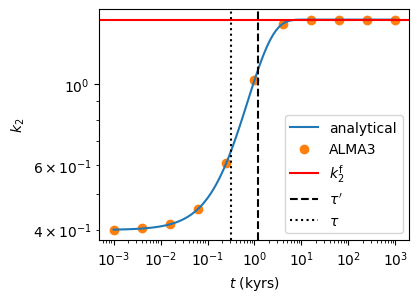

In [21]:
gamma2 = 19/2*rigidity_earth/(rho_earth*g_earth*R_earth)
tau = viscosity_earth/rigidity_earth
tau_prime = (1+gamma2)*tau

t_interp = np.logspace(-3,3,100)

fig, ax = plt.subplots(figsize=(4,3))
ax.plot(t_interp,k_an(t_interp*kyrs), label="analytical")
ax.scatter(t,k,color="C1", label="ALMA3")
ax.axhline(3/2, color="red", label="$k_2^\\mathrm{f}$")
ax.axvline(tau_prime/kyrs, color="black", linestyle="dashed", label="$\\tau'$")
ax.axvline(tau/kyrs, color="black", linestyle="dotted", label="$\\tau$")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("$t$ (kyrs)")
ax.set_ylabel("$k_2$")
ax.legend()
plt.show()